In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [3]:
!wget $data -O week-3-data.csv

--2025-10-19 12:24:51--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘week-3-data.csv’

week-3-data.csv     100%[===================>] 954.59K  --.-KB/s    in 0.009s  

2025-10-19 12:24:51 (109 MB/s) - ‘week-3-data.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('week-3-data.csv')

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_column = list(df.dtypes[df.dtypes == 'object'].index)

for i in categorical_column:
    df[i] = df[i].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

In [10]:
df.totalcharges.isnull().sum()

np.int64(0)

In [11]:
df.churn = (df.churn == 'yes').astype('int')

In [12]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [19]:
df_full_train = df_full_train.reset_index(drop=True)


In [20]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [21]:
global_churn_rate = round(df_full_train.churn.mean(), 2)

In [22]:
global_churn_rate 

np.float64(0.27)

In [23]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']  

In [24]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [26]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [27]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [28]:
from IPython.display import display

In [29]:
for i in categorical:
    print(i)
    df_group = df_full_train.groupby(i).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [32]:
#apply to all cateorical column
def mutual_info_column_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [33]:
mi = df_full_train[categorical].apply(mutual_info_column_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [34]:
#correlation for numerical columns how does churn y relate to x
df_full_train[numerical].corrwith(df_full_train.churn)


tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
df_train[['gender', 'contract']]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
4220,male,one_year
4221,male,month-to-month
4222,male,month-to-month
4223,female,two_year


In [37]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [38]:
dv = DictVectorizer(sparse=False)

In [39]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [40]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [41]:
X_train.shape

(4225, 45)

In [42]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [43]:
X_val.shape

(1409, 45)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [46]:
model.coef_[0]

array([ 6.32761767e-01, -2.51084185e-02, -7.19115258e-01, -2.02082150e-02,
       -9.12536952e-02,  5.93050661e-02, -1.08302402e-01, -6.24645743e-02,
       -3.66062561e-02, -7.48556541e-02, -3.68444927e-01,  3.65285419e-01,
       -1.08302402e-01,  7.18368945e-04, -2.42993955e-01,  1.21067844e-01,
        1.04642006e-02,  6.14522273e-02, -1.08302402e-01, -6.46117355e-02,
        2.29230016e-01, -1.08302402e-01, -2.32389525e-01, -2.39014193e-01,
        1.27552283e-01, -1.23453769e-01,  1.19918587e-02, -8.91661448e-02,
       -3.80968336e-02,  6.60061097e-02, -5.02050415e-02,  1.21067844e-01,
       -2.32529754e-01,  1.94146291e-01, -1.02543731e-01, -1.08302402e-01,
        9.93842231e-02, -6.26100164e-02, -1.08302402e-01,  5.94505082e-02,
        1.79783767e-01, -1.08302402e-01, -1.82943276e-01, -6.83235002e-02,
        3.93423686e-04])

In [47]:
model.intercept_[0]

np.float64(-0.12086818269920972)

In [48]:
model.predict_proba(X_train)[:, 1]

array([0.07417113, 0.67611124, 0.63224254, ..., 0.51380943, 0.02567049,
       0.69733833], shape=(4225,))

In [49]:
y_pred = model.predict_proba(X_val)[:, 1]

In [50]:
y_pred

array([0.0068843 , 0.20656064, 0.21837141, ..., 0.15168185, 0.78298062,
       0.81322261], shape=(1409,))

In [51]:
churn_decision = (y_pred >= 0.5)

In [52]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 313, dtype: object

In [53]:
df_prep = pd.DataFrame()
df_prep['probability'] = y_pred
df_prep['prediction'] = churn_decision
df_prep['actual'] = y_val
df_prep['diff'] = df_prep['actual'] == df_prep['prediction']

In [54]:
df_prep

,probability,prediction,actual,diff
0,0.006884,False,0,True
1,0.206561,False,0,True
2,0.218371,False,0,True
3,0.567550,True,1,True
4,0.218165,False,0,True
...,...,...,...,...
1404,0.295386,False,0,True
1405,0.041291,False,1,False
1406,0.151682,False,0,True
1407,0.782981,True,1,True


In [55]:
df_prep['diff'].mean()

np.float64(0.8062455642299503)

In [56]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.633),
 'contract=one_year': np.float64(-0.025),
 'contract=two_year': np.float64(-0.719),
 'dependents=no': np.float64(-0.02),
 'dependents=yes': np.float64(-0.091),
 'deviceprotection=no': np.float64(0.059),
 'deviceprotection=no_internet_service': np.float64(-0.108),
 'deviceprotection=yes': np.float64(-0.062),
 'gender=female': np.float64(-0.037),
 'gender=male': np.float64(-0.075),
 'internetservice=dsl': np.float64(-0.368),
 'internetservice=fiber_optic': np.float64(0.365),
 'internetservice=no': np.float64(-0.108),
 'monthlycharges': np.float64(0.001),
 'multiplelines=no': np.float64(-0.243),
 'multiplelines=no_phone_service': np.float64(0.121),
 'multiplelines=yes': np.float64(0.01),
 'onlinebackup=no': np.float64(0.061),
 'onlinebackup=no_internet_service': np.float64(-0.108),
 'onlinebackup=yes': np.float64(-0.065),
 'onlinesecurity=no': np.float64(0.229),
 'onlinesecurity=no_internet_service': np.float64(-0.108),
 'onlinesecurity=yes':

In [57]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [58]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [59]:
y_full_train = df_full_train.churn.values

In [60]:
model = LogisticRegression().fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [62]:
X_test = dv.transform(dicts_test)

In [63]:
y_predt = model.predict_proba(X_test)[:, 1]

In [64]:
churn_decision_test = (y_predt >= 0.5)

In [65]:
(churn_decision_test == y_test).mean()

np.float64(0.8147622427253371)

In [66]:
customer = dicts_test[10]

In [67]:
X_small = dv.transform([customer])

In [68]:
model.predict_proba(X_small)[:,1]

array([0.49795485])

In [69]:
y_test[10]

np.int64(0)

In [70]:
len(y_val)

1409

In [71]:
(y_val == churn_decision).sum()

np.int64(1136)

In [72]:
thresolds = np.linspace(0, 1, 21)

scores = []

for t in thresolds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.512
0.10 0.608
0.15 0.662
0.20 0.702
0.25 0.735
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.791
0.50 0.806
0.55 0.802
0.60 0.796
0.65 0.786
0.70 0.767
0.75 0.743
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


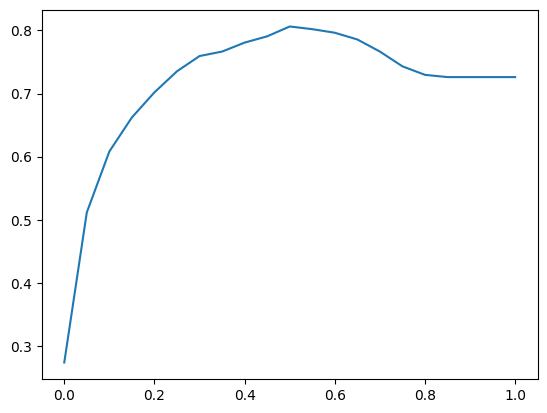

In [73]:
plt.plot(thresolds, scores)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [76]:
thresolds = np.linspace(0, 1, 21)

scores = []

for t in thresolds:
    score = accuracy_score(y_val, churn_decision)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.726
0.05 0.726
0.10 0.726
0.15 0.726
0.20 0.726
0.25 0.726
0.30 0.726
0.35 0.726
0.40 0.726
0.45 0.726
0.50 0.726
0.55 0.726
0.60 0.726
0.65 0.726
0.70 0.726
0.75 0.726
0.80 0.726
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [77]:
#confusion table for accuracy

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [78]:
t = 0.5

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [79]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [80]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [81]:
tp, tn, fp, fn

(np.int64(213), np.int64(923), np.int64(100), np.int64(173))

In [82]:
confusion_matrix = np.array([[tp, fp], [tn, fn]])

In [83]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.15, 0.07],
       [0.66, 0.12]])

In [84]:
#precision
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.8062455642299503)

In [85]:
p = tp / (tp + fp)

In [86]:
p

np.float64(0.6805111821086262)

In [87]:
r = tp / (tp + fn)

In [88]:
r

np.float64(0.5518134715025906)

In [89]:
#roc curve

tpr = tp / (fn + tp)
tpr

np.float64(0.5518134715025906)

In [90]:
fpr = fp / (fp + tn)
fpr

np.float64(0.09775171065493646)

In [91]:
thresold = np.linspace(0, 1, 101)

scoress = []

for t in thresold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scoress.append((t, tp, tn, fp, fn))

In [92]:
scoress

[(np.float64(0.0), np.int64(386), np.int64(0), np.int64(1023), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(128), np.int64(895), np.int64(1)),
 (np.float64(0.02), np.int64(383), np.int64(218), np.int64(805), np.int64(3)),
 (np.float64(0.03), np.int64(382), np.int64(274), np.int64(749), np.int64(4)),
 (np.float64(0.04), np.int64(382), np.int64(315), np.int64(708), np.int64(4)),
 (np.float64(0.05), np.int64(378), np.int64(343), np.int64(680), np.int64(8)),
 (np.float64(0.06), np.int64(377), np.int64(371), np.int64(652), np.int64(9)),
 (np.float64(0.07), np.int64(374), np.int64(401), np.int64(622), np.int64(12)),
 (np.float64(0.08), np.int64(371), np.int64(433), np.int64(590), np.int64(15)),
 (np.float64(0.09), np.int64(370), np.int64(464), np.int64(559), np.int64(16)),
 (np.float64(0.1), np.int64(366), np.int64(491), np.int64(532), np.int64(20)),
 (np.float64(0.11), np.int64(364), np.int64(510), np.int64(513), np.int64(22)),
 (np.float64(0.12), np.int64(361), np.int64(528), 

In [93]:
columns = ['thresold', 'tp', 'tn', 'fp', 'fn']
df_score = pd.DataFrame(scoress, columns=columns)

In [94]:
df_score['tpr'] = df_score.tp / (df_score.fn + df_score.tp)
df_score['fpr'] = df_score.fp / (df_score.fp + df_score.tn)

In [95]:
df_score[::10]

,thresold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,366,491,532,20,0.948187,0.520039
20,0.2,337,652,371,49,0.873057,0.362659
30,0.3,294,776,247,92,0.761658,0.241447
40,0.4,253,847,176,133,0.655440,0.172043
50,0.5,213,923,100,173,0.551813,0.097752
60,0.6,150,972,51,236,0.388601,0.049853
70,0.7,69,1011,12,317,0.178756,0.011730
80,0.8,5,1023,0,381,0.012953,0.000000
90,0.9,0,1023,0,386,0.000000,0.000000


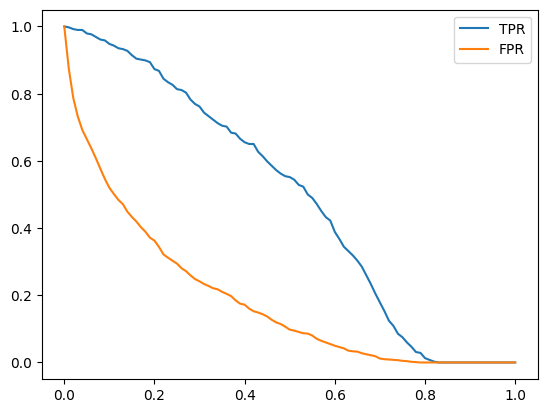

In [96]:
plt.plot(df_score['thresold'], df_score['tpr'], label='TPR')
plt.plot(df_score['thresold'], df_score['fpr'], label='FPR')
plt.legend()

In [97]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [98]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresold = np.linspace(0, 1, 101)

    scoress = []
    
    for t in thresold:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scoress.append((t, tp, tn, fp, fn))

    columns = ['thresold', 'tp', 'tn', 'fp', 'fn']
    df_score = pd.DataFrame(scoress, columns=columns)
        
    df_score['tpr'] = df_score.tp / (df_score.fn + df_score.tp)
    df_score['fpr'] = df_score.fp / (df_score.fp + df_score.tn)

    return df_score

In [99]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,thresold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


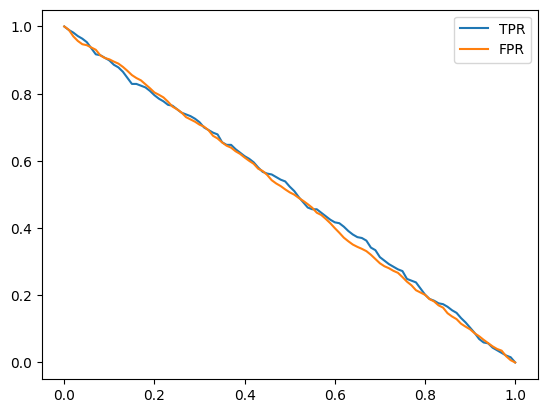

In [100]:
plt.plot(df_rand['thresold'], df_rand['tpr'], label='TPR')
plt.plot(df_rand['thresold'], df_rand['fpr'], label='FPR')
plt.legend()

In [101]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_pos

np.int64(386)

In [102]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [103]:
y_ideal_pred = np.linspace(0, 1, len(y_ideal))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [104]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [105]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

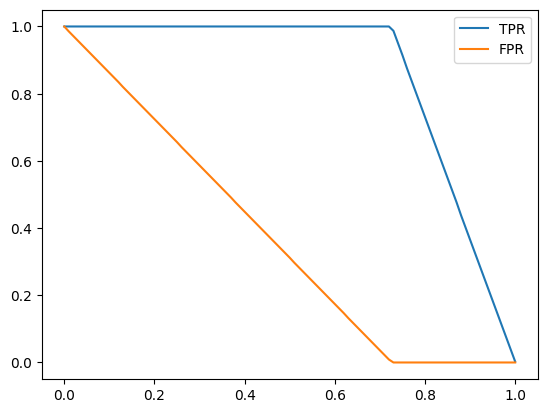

In [106]:
plt.plot(df_ideal['thresold'], df_ideal['tpr'], label='TPR')
plt.plot(df_ideal['thresold'], df_ideal['fpr'], label='FPR')
plt.legend()

In [107]:
from sklearn.metrics import auc

In [110]:
auc(df_score.fpr, df_score.tpr)

0.8461942675965741

In [111]:
from sklearn.metrics import roc_auc_score

In [116]:
roc_auc_score(y_val, y_pred)

0.8464639711505832

In [118]:
#cross validation

def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return dv, model

In [120]:
dv, model = train(df_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def predict(df, dv, model):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
predict(df_val, dv, model)